In [2]:
import pandas as pd 
import requests
import time
from bs4 import BeautifulSoup

Scraping data from The Number website

In [3]:
# functions where you put the url of the page of "the-numbers" and give you back dataframe out of it
def scrape_the_number(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    rcs = requests.get(url, headers=headers)
    soup = BeautifulSoup(rcs.text, "html.parser")
    rows = soup.select("table tr")
    data = []

    for row in rows:
        cells = row.find_all("td")
        if cells:
            data.append([cell.text.strip() for cell in cells])

    df = pd.DataFrame(data, columns=["Index", "Release Date", "Title", "Production Budget", "Domestic Gross", "Worldwide Gross"])
    return df

In [4]:
#applying the dunction and getting 1000 rows
page1 = scrape_the_number("https://www.the-numbers.com/movie/budgets/all")
page2 = scrape_the_number("https://www.the-numbers.com/movie/budgets/all/101")
page3 = scrape_the_number("https://www.the-numbers.com/movie/budgets/all/201")
page4 = scrape_the_number("https://www.the-numbers.com/movie/budgets/all/301")
page5 = scrape_the_number("https://www.the-numbers.com/movie/budgets/all/401")
page6 = scrape_the_number("https://www.the-numbers.com/movie/budgets/all/501")
page7 = scrape_the_number("https://www.the-numbers.com/movie/budgets/all/601")
page8 = scrape_the_number("https://www.the-numbers.com/movie/budgets/all/701")
page9 = scrape_the_number("https://www.the-numbers.com/movie/budgets/all/801")
page10 = scrape_the_number("https://www.the-numbers.com/movie/budgets/all/901")


Concating the pages to one result

In [4]:
the_number_df = pd.concat([page1, page2, page3, page4, page5, page6, page7, page8, page9, page10], ignore_index=True)
the_number_df =  the_number_df.drop(columns="Index")

Now using the OMDB api though a function 

In [ ]:
# 2. OMDB function to apply on the list by title to get info

key = "2f9babf3"
def get_movie_info(title):
    url = f"http://www.omdbapi.com/?t={title}&apikey={key}"
    res = requests.get(url).json()
    time.sleep(0.2)
    
    return res

omdb_data = the_number_df["Title"].apply(get_movie_info)

In [53]:
# converting the results to pd dataframe
omdb_df = pd.DataFrame(omdb_data.tolist())

adding one column with made index to match the two dataffram (the two dataframe has the same order but they don't necceserlly match the title)

In [ ]:
omdb = omdb_df.reset_index()
the_number = the_number_df.reset_index()

Merging the two dataframes

In [66]:
df_full_col = pd.merge(the_number, omdb, on = "index", how = "inner")

Saving the data to my local disk

In [1]:
# this would save it in the folder that you are working on
df_full_col.to_csv("df_full_col_muayad.csv", index=False)

NameError: name 'df_full_col' is not defined

Cleaning data

In [76]:
df_full_col.head()

,index,Release Date,Title_x,Production Budget,Domestic Gross,Worldwide Gross,Response,Error,Title_y,Year,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,totalSeasons
0,0,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835",False,Movie not found!,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,717,503,922",True,NaN,Avengers: Endgame,2019,...,78,8.4,"1,390,337",tt4154796,movie,N/A,"$858,373,000",N/A,N/A,NaN
2,2,"Dec 9, 2022",Avatar: The Way of Water,"$400,000,000","$688,809,501","$2,322,902,023",True,NaN,Avatar: The Way of Water,2022,...,67,7.5,"546,561",tt1630029,movie,N/A,"$684,075,767",N/A,N/A,NaN
3,3,"May 17, 2025",Mission: Impossible—The Final Reckoning,"$400,000,000","$197,413,515","$591,353,074",True,NaN,Mission: Impossible - The Final Reckoning,2025,...,67,7.3,"160,935",tt9603208,movie,N/A,"$197,413,515",N/A,N/A,NaN
4,4,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",True,NaN,Pirates of the Caribbean: On Stranger Tides,2011,...,45,6.6,"594,656",tt1298650,movie,N/A,"$241,071,802",N/A,N/A,NaN


In [6]:
df = pd.read_csv("df_full_col.csv")
df

,index,Release Date,Title_x,Production Budget,Domestic Gross,Worldwide Gross,Response,Error,Title_y,Year,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,totalSeasons
0,0,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835",False,Movie not found!,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,717,503,922",True,NaN,Avengers: Endgame,2019,...,78.0,8.4,"1,390,337",tt4154796,movie,NaN,"$858,373,000",NaN,NaN,NaN
2,2,"Dec 9, 2022",Avatar: The Way of Water,"$400,000,000","$688,809,501","$2,322,902,023",True,NaN,Avatar: The Way of Water,2022,...,67.0,7.5,"546,561",tt1630029,movie,NaN,"$684,075,767",NaN,NaN,NaN
3,3,"May 17, 2025",Mission: Impossible—The Final Reckoning,"$400,000,000","$197,413,515","$591,353,074",True,NaN,Mission: Impossible - The Final Reckoning,2025,...,67.0,7.3,"160,935",tt9603208,movie,NaN,"$197,413,515",NaN,NaN,NaN
4,4,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",True,NaN,Pirates of the Caribbean: On Stranger Tides,2011,...,45.0,6.6,"594,656",tt1298650,movie,NaN,"$241,071,802",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,"Jul 17, 1998",The Mask of Zorro,"$65,000,000","$93,828,745","$233,700,000",True,NaN,The Mask of Zorro,1998,...,62.0,6.8,"204,593",tt0120746,movie,NaN,"$94,095,523",NaN,NaN,NaN
996,996,"Aug 4, 2000",Space Cowboys,"$65,000,000","$90,454,043","$128,874,043",True,NaN,Space Cowboys,2000,...,73.0,6.5,"88,855",tt0186566,movie,NaN,"$90,464,773",NaN,NaN,NaN
997,997,"Dec 18, 2014",Annie,"$65,000,000","$85,911,262","$139,829,625",True,NaN,Annie,1982,...,39.0,6.6,"51,861",tt0083564,movie,NaN,"$57,059,003",NaN,NaN,NaN
998,998,"May 28, 1993",Cliffhanger,"$65,000,000","$84,049,211","$255,000,000",True,NaN,Cliffhanger,1993,...,59.0,6.5,"145,457",tt0106582,movie,NaN,"$84,049,211",NaN,NaN,NaN


In [ ]:
#Clean the Title column
if 'Title_x' in df.columns and 'Title_y' in df.columns:
    # Prefer the non-null title between Title_x and Title_y
    df['Title'] = df['Title_x'].combine_first(df['Title_y'])
    df.drop(['Title_x', 'Title_y'], axis=1, inplace=True)
elif 'Title_x' in df.columns:
    df.rename(columns={'Title_x': 'Title'}, inplace=True)
elif 'Title_y' in df.columns:
    df.rename(columns={'Title_y': 'Title'}, inplace=True)

# Step 4: Clean the Title column
df['Title'] = df['Title'].astype(str).str.strip()  # remove leading/trailing spaces
df['Title'] = df['Title'].str.replace(r'\s+', ' ', regex=True)  # remove multiple spaces
df['Title'] = df['Title'].str.title()  # capitalize properly

# Step 5: Drop duplicates or missing titles
df = df.drop_duplicates(subset='Title')
df = df.dropna(subset=['Title'])

In [8]:
print(df['Title'].head(10))

0           Star Wars Ep. Vii: The Force Awakens
1                              Avengers: Endgame
2                       Avatar: The Way Of Water
3        Mission: Impossible—The Final Reckoning
4    Pirates Of The Caribbean: On Stranger Tides
5                        Avengers: Age Of Ultron
6                                         Fast X
7                        Solo: A Star Wars Story
8                         Avengers: Infinity War
9       Pirates Of The Caribbean: At World’S End
Name: Title, dtype: object


In [9]:
df

,index,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Response,Error,Year,Rated,Released,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,totalSeasons,Title
0,0,"Dec 16, 2015","$533,200,000","$936,662,225","$2,056,046,835",False,Movie not found!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Star Wars Ep. Vii: The Force Awakens
1,1,"Apr 23, 2019","$400,000,000","$858,373,000","$2,717,503,922",True,NaN,2019,PG-13,26 Apr 2019,...,8.4,"1,390,337",tt4154796,movie,NaN,"$858,373,000",NaN,NaN,NaN,Avengers: Endgame
2,2,"Dec 9, 2022","$400,000,000","$688,809,501","$2,322,902,023",True,NaN,2022,PG-13,16 Dec 2022,...,7.5,"546,561",tt1630029,movie,NaN,"$684,075,767",NaN,NaN,NaN,Avatar: The Way Of Water
3,3,"May 17, 2025","$400,000,000","$197,413,515","$591,353,074",True,NaN,2025,PG-13,23 May 2025,...,7.3,"160,935",tt9603208,movie,NaN,"$197,413,515",NaN,NaN,NaN,Mission: Impossible—The Final Reckoning
4,4,"May 20, 2011","$379,000,000","$241,071,802","$1,045,713,802",True,NaN,2011,PG-13,20 May 2011,...,6.6,"594,656",tt1298650,movie,NaN,"$241,071,802",NaN,NaN,NaN,Pirates Of The Caribbean: On Stranger Tides
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,"Jul 17, 1998","$65,000,000","$93,828,745","$233,700,000",True,NaN,1998,PG-13,17 Jul 1998,...,6.8,"204,593",tt0120746,movie,NaN,"$94,095,523",NaN,NaN,NaN,The Mask Of Zorro
996,996,"Aug 4, 2000","$65,000,000","$90,454,043","$128,874,043",True,NaN,2000,PG-13,04 Aug 2000,...,6.5,"88,855",tt0186566,movie,NaN,"$90,464,773",NaN,NaN,NaN,Space Cowboys
997,997,"Dec 18, 2014","$65,000,000","$85,911,262","$139,829,625",True,NaN,1982,PG,18 Jun 1982,...,6.6,"51,861",tt0083564,movie,NaN,"$57,059,003",NaN,NaN,NaN,Annie
998,998,"May 28, 1993","$65,000,000","$84,049,211","$255,000,000",True,NaN,1993,R,28 May 1993,...,6.5,"145,457",tt0106582,movie,NaN,"$84,049,211",NaN,NaN,NaN,Cliffhanger


In [ ]:
#drop unnecessary columns
df = df.drop(columns=['Production', 'Website', 'totalSeasons', 'DVD', 'Error'], errors='ignore')
print(df.columns)

Index(['index', 'Release Date', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross', 'Response', 'Year', 'Rated', 'Released', 'Runtime',
       'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country',
       'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes',
       'imdbID', 'Type', 'BoxOffice', 'Title'],
      dtype='object')


In [12]:
df

,index,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Response,Year,Rated,Released,Runtime,...,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,BoxOffice,Title
0,0,"Dec 16, 2015","$533,200,000","$936,662,225","$2,056,046,835",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Star Wars Ep. Vii: The Force Awakens
1,1,"Apr 23, 2019","$400,000,000","$858,373,000","$2,717,503,922",True,2019,PG-13,26 Apr 2019,181 min,...,Nominated for 1 Oscar. 70 wins & 132 nominatio...,https://m.media-amazon.com/images/M/MV5BMTc5MD...,"[{'Source': 'Internet Movie Database', 'Value'...",78.0,8.4,"1,390,337",tt4154796,movie,"$858,373,000",Avengers: Endgame
2,2,"Dec 9, 2022","$400,000,000","$688,809,501","$2,322,902,023",True,2022,PG-13,16 Dec 2022,192 min,...,Won 1 Oscar. 73 wins & 152 nominations total,https://m.media-amazon.com/images/M/MV5BMWNlMW...,"[{'Source': 'Internet Movie Database', 'Value'...",67.0,7.5,"546,561",tt1630029,movie,"$684,075,767",Avatar: The Way Of Water
3,3,"May 17, 2025","$400,000,000","$197,413,515","$591,353,074",True,2025,PG-13,23 May 2025,169 min,...,6 wins & 3 nominations total,https://m.media-amazon.com/images/M/MV5BZGQ5NG...,"[{'Source': 'Internet Movie Database', 'Value'...",67.0,7.3,"160,935",tt9603208,movie,"$197,413,515",Mission: Impossible—The Final Reckoning
4,4,"May 20, 2011","$379,000,000","$241,071,802","$1,045,713,802",True,2011,PG-13,20 May 2011,136 min,...,3 wins & 31 nominations total,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",45.0,6.6,"594,656",tt1298650,movie,"$241,071,802",Pirates Of The Caribbean: On Stranger Tides
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,"Jul 17, 1998","$65,000,000","$93,828,745","$233,700,000",True,1998,PG-13,17 Jul 1998,136 min,...,Nominated for 2 Oscars. 9 wins & 18 nomination...,https://m.media-amazon.com/images/M/MV5BMzA2MD...,"[{'Source': 'Internet Movie Database', 'Value'...",62.0,6.8,"204,593",tt0120746,movie,"$94,095,523",The Mask Of Zorro
996,996,"Aug 4, 2000","$65,000,000","$90,454,043","$128,874,043",True,2000,PG-13,04 Aug 2000,130 min,...,Nominated for 1 Oscar. 4 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BMTk4Nz...,"[{'Source': 'Internet Movie Database', 'Value'...",73.0,6.5,"88,855",tt0186566,movie,"$90,464,773",Space Cowboys
997,997,"Dec 18, 2014","$65,000,000","$85,911,262","$139,829,625",True,1982,PG,18 Jun 1982,127 min,...,Nominated for 2 Oscars. 3 wins & 13 nomination...,https://m.media-amazon.com/images/M/MV5BZjQzOG...,"[{'Source': 'Internet Movie Database', 'Value'...",39.0,6.6,"51,861",tt0083564,movie,"$57,059,003",Annie
998,998,"May 28, 1993","$65,000,000","$84,049,211","$255,000,000",True,1993,R,28 May 1993,113 min,...,Nominated for 3 Oscars. 1 win & 12 nominations...,https://m.media-amazon.com/images/M/MV5BNGJkZm...,"[{'Source': 'Internet Movie Database', 'Value'...",59.0,6.5,"145,457",tt0106582,movie,"$84,049,211",Cliffhanger


In [13]:
# Current columns
cols = df.columns.tolist()

# Only proceed if both columns exist
if 'Title' in cols and 'Release Date' in cols:
    # Remove Title from its current spot
    cols.remove('Title')
    # Find the position of 'Release Date'
    pos = cols.index('Release Date')
    # Insert Title right before Release Date
    cols.insert(pos, 'Title')
    # Reorder the DataFrame
    df = df[cols]

print(df.columns)
df

Index(['index', 'Title', 'Release Date', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross', 'Response', 'Year', 'Rated', 'Released', 'Runtime',
       'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country',
       'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes',
       'imdbID', 'Type', 'BoxOffice'],
      dtype='object')


,index,Title,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Response,Year,Rated,Released,...,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,BoxOffice
0,0,Star Wars Ep. Vii: The Force Awakens,"Dec 16, 2015","$533,200,000","$936,662,225","$2,056,046,835",False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Avengers: Endgame,"Apr 23, 2019","$400,000,000","$858,373,000","$2,717,503,922",True,2019,PG-13,26 Apr 2019,...,United States,Nominated for 1 Oscar. 70 wins & 132 nominatio...,https://m.media-amazon.com/images/M/MV5BMTc5MD...,"[{'Source': 'Internet Movie Database', 'Value'...",78.0,8.4,"1,390,337",tt4154796,movie,"$858,373,000"
2,2,Avatar: The Way Of Water,"Dec 9, 2022","$400,000,000","$688,809,501","$2,322,902,023",True,2022,PG-13,16 Dec 2022,...,United States,Won 1 Oscar. 73 wins & 152 nominations total,https://m.media-amazon.com/images/M/MV5BMWNlMW...,"[{'Source': 'Internet Movie Database', 'Value'...",67.0,7.5,"546,561",tt1630029,movie,"$684,075,767"
3,3,Mission: Impossible—The Final Reckoning,"May 17, 2025","$400,000,000","$197,413,515","$591,353,074",True,2025,PG-13,23 May 2025,...,"United Kingdom, United States",6 wins & 3 nominations total,https://m.media-amazon.com/images/M/MV5BZGQ5NG...,"[{'Source': 'Internet Movie Database', 'Value'...",67.0,7.3,"160,935",tt9603208,movie,"$197,413,515"
4,4,Pirates Of The Caribbean: On Stranger Tides,"May 20, 2011","$379,000,000","$241,071,802","$1,045,713,802",True,2011,PG-13,20 May 2011,...,"United States, United Kingdom",3 wins & 31 nominations total,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",45.0,6.6,"594,656",tt1298650,movie,"$241,071,802"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,The Mask Of Zorro,"Jul 17, 1998","$65,000,000","$93,828,745","$233,700,000",True,1998,PG-13,17 Jul 1998,...,"United States, Mexico, Germany",Nominated for 2 Oscars. 9 wins & 18 nomination...,https://m.media-amazon.com/images/M/MV5BMzA2MD...,"[{'Source': 'Internet Movie Database', 'Value'...",62.0,6.8,"204,593",tt0120746,movie,"$94,095,523"
996,996,Space Cowboys,"Aug 4, 2000","$65,000,000","$90,454,043","$128,874,043",True,2000,PG-13,04 Aug 2000,...,United States,Nominated for 1 Oscar. 4 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BMTk4Nz...,"[{'Source': 'Internet Movie Database', 'Value'...",73.0,6.5,"88,855",tt0186566,movie,"$90,464,773"
997,997,Annie,"Dec 18, 2014","$65,000,000","$85,911,262","$139,829,625",True,1982,PG,18 Jun 1982,...,United States,Nominated for 2 Oscars. 3 wins & 13 nomination...,https://m.media-amazon.com/images/M/MV5BZjQzOG...,"[{'Source': 'Internet Movie Database', 'Value'...",39.0,6.6,"51,861",tt0083564,movie,"$57,059,003"
998,998,Cliffhanger,"May 28, 1993","$65,000,000","$84,049,211","$255,000,000",True,1993,R,28 May 1993,...,"France, Italy, Japan, United States",Nominated for 3 Oscars. 1 win & 12 nominations...,https://m.media-amazon.com/images/M/MV5BNGJkZm...,"[{'Source': 'Internet Movie Database', 'Value'...",59.0,6.5,"145,457",tt0106582,movie,"$84,049,211"


In [14]:
import numpy as np

# Pick the columns you want to convert
money_cols = ["Worldwide Gross", "BoxOffice", "Domestic Gross", "Production Budget"]

for col in money_cols:
    if col in df.columns:
        # 1) turn to string
        s = df[col].astype(str)
        # 2) remove everything that isn't a digit or a dot
        s = s.str.replace(r"[^0-9.]", "", regex=True)
        # 3) empty strings -> NaN
        s = s.replace("", np.nan)
        # 4) convert to float
        df[col] = s.astype(float)

# Quick check
df[money_cols].dtypes


Worldwide Gross      float64
BoxOffice            float64
Domestic Gross       float64
Production Budget    float64
dtype: object

In [23]:
# Clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [24]:
df

,index,title,release_date,production_budget,domestic_gross,worldwide_gross,response,year,rated,released,...,country,awards,poster,ratings,metascore,imdbrating,imdbvotes,imdbid,type,boxoffice
0,0,Star Wars Ep. Vii: The Force Awakens,"Dec 16, 2015",533200000.0,936662225.0,2.056047e+09,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Avengers: Endgame,"Apr 23, 2019",400000000.0,858373000.0,2.717504e+09,True,2019,PG-13,26 Apr 2019,...,United States,Nominated for 1 Oscar. 70 wins & 132 nominatio...,https://m.media-amazon.com/images/M/MV5BMTc5MD...,"[{'Source': 'Internet Movie Database', 'Value'...",78.0,8.4,"1,390,337",tt4154796,movie,858373000.0
2,2,Avatar: The Way Of Water,"Dec 9, 2022",400000000.0,688809501.0,2.322902e+09,True,2022,PG-13,16 Dec 2022,...,United States,Won 1 Oscar. 73 wins & 152 nominations total,https://m.media-amazon.com/images/M/MV5BMWNlMW...,"[{'Source': 'Internet Movie Database', 'Value'...",67.0,7.5,"546,561",tt1630029,movie,684075767.0
3,3,Mission: Impossible—The Final Reckoning,"May 17, 2025",400000000.0,197413515.0,5.913531e+08,True,2025,PG-13,23 May 2025,...,"United Kingdom, United States",6 wins & 3 nominations total,https://m.media-amazon.com/images/M/MV5BZGQ5NG...,"[{'Source': 'Internet Movie Database', 'Value'...",67.0,7.3,"160,935",tt9603208,movie,197413515.0
4,4,Pirates Of The Caribbean: On Stranger Tides,"May 20, 2011",379000000.0,241071802.0,1.045714e+09,True,2011,PG-13,20 May 2011,...,"United States, United Kingdom",3 wins & 31 nominations total,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",45.0,6.6,"594,656",tt1298650,movie,241071802.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,The Mask Of Zorro,"Jul 17, 1998",65000000.0,93828745.0,2.337000e+08,True,1998,PG-13,17 Jul 1998,...,"United States, Mexico, Germany",Nominated for 2 Oscars. 9 wins & 18 nomination...,https://m.media-amazon.com/images/M/MV5BMzA2MD...,"[{'Source': 'Internet Movie Database', 'Value'...",62.0,6.8,"204,593",tt0120746,movie,94095523.0
996,996,Space Cowboys,"Aug 4, 2000",65000000.0,90454043.0,1.288740e+08,True,2000,PG-13,04 Aug 2000,...,United States,Nominated for 1 Oscar. 4 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BMTk4Nz...,"[{'Source': 'Internet Movie Database', 'Value'...",73.0,6.5,"88,855",tt0186566,movie,90464773.0
997,997,Annie,"Dec 18, 2014",65000000.0,85911262.0,1.398296e+08,True,1982,PG,18 Jun 1982,...,United States,Nominated for 2 Oscars. 3 wins & 13 nomination...,https://m.media-amazon.com/images/M/MV5BZjQzOG...,"[{'Source': 'Internet Movie Database', 'Value'...",39.0,6.6,"51,861",tt0083564,movie,57059003.0
998,998,Cliffhanger,"May 28, 1993",65000000.0,84049211.0,2.550000e+08,True,1993,R,28 May 1993,...,"France, Italy, Japan, United States",Nominated for 3 Oscars. 1 win & 12 nominations...,https://m.media-amazon.com/images/M/MV5BNGJkZm...,"[{'Source': 'Internet Movie Database', 'Value'...",59.0,6.5,"145,457",tt0106582,movie,84049211.0


#### Movies with lower production budgets can still achieve high IMDb ratings.

In [25]:
low_budget_threshold = df["production_budget"].quantile(0.25)  # bottom 25%
high_rating_threshold = df["imdbrating"].quantile(0.75)       # top 25%

low_budget_high_rating = df[
    (df["production_budget"] <= low_budget_threshold) &
    (df["imdbrating"] >= high_rating_threshold)
]

low_budget_high_rating[["title", "production_budget", "imdbrating", "genre"]].sort_values(
    "imdbrating", ascending=False
).head(10)



,title,production_budget,imdbrating,genre
984,The Matrix,65000000.0,8.7,"Action, Sci-Fi"
979,Saving Private Ryan,65000000.0,8.6,"Drama, War"
725,Daredevil,80000000.0,8.6,"Action, Crime, Drama"
764,Walking With Dinosaurs,80000000.0,8.5,"Documentary, Animation, History"
893,Inglourious Basterds,70000000.0,8.4,"Adventure, Drama, War"
876,Braveheart,72000000.0,8.3,"Biography, Drama, War"
717,Shutter Island,80000000.0,8.2,"Drama, Mystery, Thriller"
788,A Beautiful Mind,78000000.0,8.2,"Biography, Drama, Mystery"
789,The Wild Robot,78000000.0,8.2,"Animation, Adventure, Family"
768,Ne Zha 2 (哪吒之魔童闹海),80000000.0,8.0,"Animation, Action, Adventure"


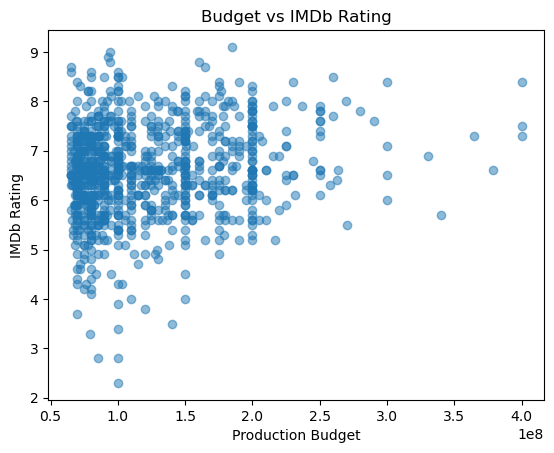

In [27]:
import matplotlib.pyplot as plt

plt.scatter(df["production_budget"], df["imdbrating"], alpha=0.5)
plt.xlabel("Production Budget")
plt.ylabel("IMDb Rating")
plt.title("Budget vs IMDb Rating")
plt.show()


/var/folders/cv/pfmqj_4n6fg_b8vt_pytwxwr0000gn/T/ipykernel_86191/592723963.py:37: UserWarning: Glyph 21738 (\N{CJK UNIFIED IDEOGRAPH-54EA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cv/pfmqj_4n6fg_b8vt_pytwxwr0000gn/T/ipykernel_86191/592723963.py:37: UserWarning: Glyph 21522 (\N{CJK UNIFIED IDEOGRAPH-5412}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cv/pfmqj_4n6fg_b8vt_pytwxwr0000gn/T/ipykernel_86191/592723963.py:37: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cv/pfmqj_4n6fg_b8vt_pytwxwr0000gn/T/ipykernel_86191/592723963.py:37: UserWarning: Glyph 39764 (\N{CJK UNIFIED IDEOGRAPH-9B54}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cv/pfmqj_4n6fg_b8vt_pytwxwr0000gn/T/ipykernel_86191/592723963.py:37: UserWarning: Glyph 31461 (\N{CJK UNIFIED IDEOGRAPH-7AE5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cv/pfmqj_4n6

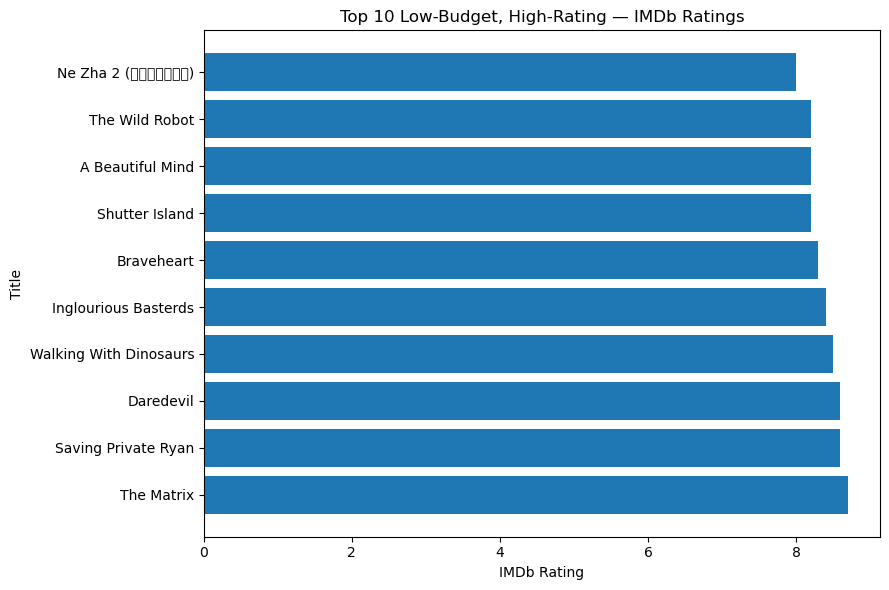

In [29]:
import pandas as pd
from textwrap import shorten
import matplotlib.pyplot as plt

# Make sure types are numeric
df["production_budget"] = pd.to_numeric(df["production_budget"], errors="coerce")
df["imdbrating"] = pd.to_numeric(df["imdbrating"], errors="coerce")

# Drop rows missing either value
subset = df.dropna(subset=["production_budget", "imdbrating"])

# Define “low budget” (bottom 25%) & “high rating” (top 25%)
low_budget = subset["production_budget"].quantile(0.25)
high_rating = subset["imdbrating"].quantile(0.75)

# Pick candidates, then keep Top 10 by rating
top10 = (subset[(subset["production_budget"] <= low_budget) &
                (subset["imdbrating"] >= high_rating)]
         .sort_values("imdbrating", ascending=False)
         .head(10))

# Fallback if fewer than 10 found
if len(top10) < 10:
    top10 = (subset.sort_values(["production_budget", "imdbrating"],
                                ascending=[True, False])
                    .head(10))

# ----- Chart: Horizontal bar of ratings -----
titles = [shorten(str(t), width=22, placeholder="…") for t in top10["title"]]
ratings = top10["imdbrating"].tolist()

plt.figure(figsize=(9,6))
plt.barh(titles, ratings)
plt.xlabel("IMDb Rating")
plt.ylabel("Title")
plt.title("Top 10 Low-Budget, High-Rating — IMDb Ratings")
plt.tight_layout()
plt.show()
